In [1]:
#import packages
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import MiniBatchKMeans
import datetime

#import data

Products = pd.read_csv('/Users/Kevin/Downloads/Product.csv')

EndUser = pd.read_csv('/Users/Kevin/Downloads/EndUser.csv')

Invoice = pd.read_csv('/Users/Kevin/Downloads/Invoice.csv')

Vendor = pd.read_csv('/Users/Kevin/Downloads/Vendor.csv')

Invoice.head()

,COUNTRY_CODE,INVOICE_DATE,INVOICE_ID,INVOICE_LINE,PRODUCT_ID,UNITE_PRICE_$,QUANTITY_ORDERED,END_USER_ID
0,UK,07/15/2019,E5ED03155812D08AF95C0DE6C6CFC756,1,74B2CFB8460D047F00CEC531319C7768,3285.863338,6,68D292A10256DB24405C56738F34D976
1,UK,06/06/2019,060AFA0DDB5F61AE58689DE4E1C45F66,1,9A5264F9ED8507F6F31112E24917452D,418.152176,1,4B39A21A1DD7881D4E165B9E90A4B831
2,UK,04/04/2019,95F78CBA7E223D0441DBE5EC9139C534,1,42A3AE06A8DC14FF62FDA90A55292CAA,60.578612,1,BE572735EA42E603C64667A191FAB9F6
3,UK,02/20/2019,14104E4FCCE6B2BF8A3CC8321DC1B5AE,1,F5B5DB9152AEE5BC633DEF60AC30203D,69.704712,6,E781130707853D0407533FC5433CF0BB
4,UK,11/07/2019,1176EAEA7C94F29A0335D9A5EE9D2A0D,1,59343B86E5B56460844F92C4A87ED4D1,566.165348,1,B9B2476B6EBE1C6657CACC1C836BDF6C


In [2]:
#data

I = Invoice.groupby('END_USER_ID')['UNITE_PRICE_$'].apply(sum)
J = pd.DataFrame({'END_USER_ID':I.index, 'TOTAL_SPENT':I.values})
Invoice = pd.merge(Invoice, J,on='END_USER_ID')

data = pd.merge(Products, Vendor,on='VENDOR_ID')
data = pd.merge(data, Invoice,on='PRODUCT_ID')
data = pd.merge(data, EndUser,on='END_USER_ID')
data.head()



,Unnamed: 0_x,COUNTRY_CODE_x,PRODUCT_ID,PRODUCT_DECS,PRODUCT_CAT,PRODUCT_SUBCAT,VENDOR_ID,Unnamed: 0_y,COUNTRY_CODE_y,VENDOR_NAME,...,TOTAL_SPENT,Unnamed: 0,COUNTRY_CODE_y,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED
0,0,UK,9E801BBAA766E00E05FBEFC26A8625A9,MULTI ROLLER SCALE LAPTOP BAG 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
1,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
2,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
3,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
4,813,UK,8678A0159CC487E3B6F855B2B3A6C75C,PIN POINT PRESENTATION POINTER W/INTEGRATED LA...,INPUT DEVICES,INPUT DEVICE ACCS,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006


In [3]:
#bin annual sales
pd.qcut(data['ANNUAL_SALES'], q=3)

0          (73842408.0, 278397000000.0]
1          (73842408.0, 278397000000.0]
2          (73842408.0, 278397000000.0]
3          (73842408.0, 278397000000.0]
4          (73842408.0, 278397000000.0]
                       ...             
1127005              (0.999, 2111946.0]
1127006                             NaN
1127007                             NaN
1127008              (0.999, 2111946.0]
1127009              (0.999, 2111946.0]
Name: ANNUAL_SALES, Length: 1127010, dtype: category
Categories (3, interval[float64]): [(0.999, 2111946.0] < (2111946.0, 73842408.0] < (73842408.0, 278397000000.0]]

In [4]:
data['total_spent_bin'] = pd.qcut(data['TOTAL_SPENT'], q=3)
data['Annual_Sales_bin'] = pd.qcut(data['ANNUAL_SALES'], q=3)

In [5]:
d2= data.drop_duplicates(subset = ['PRODUCT_ID','END_USER_ID'], keep = 'last')

In [6]:
d4= data.drop_duplicates(subset = ['VENDOR_ID','END_USER_ID'], keep = 'last')

In [7]:
## get a list of all users and the products they purchased
productsPerUser = d2.groupby('END_USER_ID')['PRODUCT_ID'].apply(list)
PPU = pd.DataFrame({'END_USER_ID':productsPerUser.index, 'Products':productsPerUser.values})
PPU

,END_USER_ID,Products
0,000132B479F0F56A47249E8093C7C180,[D6E579C0D0EFA6C5405370CE1FB0D3F9]
1,00017609D0C74E6CE907CFF9111F412E,[CE291FDC88ED34CE85AE2B7D9788CB50]
2,0001CCEEC0E80598BB94ACC3247E7710,"[950564EBBBD448E0C3ACE0B1DDEE72CE, EB1F0052603..."
3,000242D514CE9634091A121F64F972FB,"[CA12E9CD8273215CF1AB049DA2A1059F, DB9BCE4AC01..."
4,0002A1EF533B2E30C136BD9E0B3C7F90,"[08CFE495D892BF022C6301BAD41DEA20, D075CB4D4A1..."
...,...,...
148458,FFFEAEB6AADD794DF0A99CD82E0289FB,[595CAAD82A96B4503DD83350025BB9FD]
148459,FFFEB6ACEABBA3F95BB5DE57828412DF,[FFB433CAF9AD532AFAFD4D772C0E8BD2]
148460,FFFF75E2F481CE59842E7139776CAAAD,[243492F4AEA4B5F0CA699E5F3E349A50]
148461,FFFFACBEEAEC71689FFABD9FBEC05EB4,"[92FF572DF06ADB5A20ED3E742610EAB9, 8BB932FC0CC..."


In [8]:
VendorPerUser = d4.groupby("END_USER_ID")["VENDOR_ID"].apply(list)
VPU= pd.DataFrame({'END_USER_ID':VendorPerUser.index, 'Vendor':VendorPerUser.values})
VPU

,END_USER_ID,Vendor
0,000132B479F0F56A47249E8093C7C180,[7ED5AB2BFA4C55BD87D00B17B4A4D970]
1,00017609D0C74E6CE907CFF9111F412E,[C76DA52B2FCE23F1949FAAC059A27E44]
2,0001CCEEC0E80598BB94ACC3247E7710,"[A4190183C76E071BEE5E74B2629C637F, 368A7CB85E9..."
3,000242D514CE9634091A121F64F972FB,[ADFBBD3C396430AD163CC304E95FE5A7]
4,0002A1EF533B2E30C136BD9E0B3C7F90,"[ADFBBD3C396430AD163CC304E95FE5A7, F2385A685B2..."
...,...,...
148458,FFFEAEB6AADD794DF0A99CD82E0289FB,[300D8636ADA68AAA8F7D2494D70BC330]
148459,FFFEB6ACEABBA3F95BB5DE57828412DF,[11CA995A4746A5BB9A6C08B284DC8DA0]
148460,FFFF75E2F481CE59842E7139776CAAAD,[300D8636ADA68AAA8F7D2494D70BC330]
148461,FFFFACBEEAEC71689FFABD9FBEC05EB4,"[81D15DF54B2371844A5F42485E6B4C33, 6B6A40374A4..."


In [9]:
d3 = data[['END_USER_ID','total_spent_bin']].drop_duplicates(subset = ['END_USER_ID','total_spent_bin'])
d3

,END_USER_ID,total_spent_bin
0,0DF9912E0B03F1B29912720999323F3C,"(709053.885, 48269844.737]"
15892,A0FDB4C93FD46033CC782AA1DD83D78E,"(709053.885, 48269844.737]"
23333,4FD0E289560F5AF8CDF2664A68FDAF12,"(709053.885, 48269844.737]"
26010,FBEFFA3FE060AF057CEA1574CD25DF20,"(7279.18, 709053.885]"
26235,D35367187F19EF4EEB3677869177E469,"(7279.18, 709053.885]"
...,...,...
1127005,B1F5EFF9FF2A89EE6932BBC293D2E7AB,"(9.001000000000001, 7279.18]"
1127006,53F5AA6A5F01D9362137FA674BA9AF8C,"(9.001000000000001, 7279.18]"
1127007,107FE731E5F1ECD71AFEEA7317FC1106,"(9.001000000000001, 7279.18]"
1127008,4C22DB3BC32A03A66C6690A7F08DA42E,"(9.001000000000001, 7279.18]"


In [10]:

#frames = [PPU, VPU, SPU]

result = pd.merge(PPU, VPU, on='END_USER_ID')
#result = pd.merge(result, SPU, on='END_USER_ID')
result = pd.merge(result, EndUser, on='END_USER_ID')

result['Annual_Sales_bin'] = pd.qcut(result['ANNUAL_SALES'], q=3)

result = pd.merge(result, d3, on='END_USER_ID')
result

,END_USER_ID,Products,Vendor,Unnamed: 0,COUNTRY_CODE,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED,Annual_Sales_bin,total_spent_bin
0,000132B479F0F56A47249E8093C7C180,[D6E579C0D0EFA6C5405370CE1FB0D3F9],[7ED5AB2BFA4C55BD87D00B17B4A4D970],65309,UK,NaN,Services,Legal Services,Legal Services,<20,188958.0,2019,"(0.999, 233044.0]","(9.001000000000001, 7279.18]"
1,00017609D0C74E6CE907CFF9111F412E,[CE291FDC88ED34CE85AE2B7D9788CB50],[C76DA52B2FCE23F1949FAAC059A27E44],12548,UK,BELFAST,Wholesale Trade,Wholesale Trade-durable Goods,"Machinery, Equipment, And Supplies",<20,1287474.0,2000,"(233044.0, 2219646.0]","(9.001000000000001, 7279.18]"
2,0001CCEEC0E80598BB94ACC3247E7710,"[950564EBBBD448E0C3ACE0B1DDEE72CE, EB1F0052603...","[A4190183C76E071BEE5E74B2629C637F, 368A7CB85E9...",92729,UK,DERBYSHIRE,Retail Trade,Miscellaneous Retail,"Retail Stores, Not Elsewhere Classified",UNKNOWN,154042987.0,2004,"(2219646.0, 278397000000.0]","(9.001000000000001, 7279.18]"
3,000242D514CE9634091A121F64F972FB,"[CA12E9CD8273215CF1AB049DA2A1059F, DB9BCE4AC01...",[ADFBBD3C396430AD163CC304E95FE5A7],68297,UK,CHESHIRE,Retail Trade,Miscellaneous Retail,Nonstore Retailers,<20,52419.0,2012,"(0.999, 233044.0]","(9.001000000000001, 7279.18]"
4,0002A1EF533B2E30C136BD9E0B3C7F90,"[08CFE495D892BF022C6301BAD41DEA20, D075CB4D4A1...","[ADFBBD3C396430AD163CC304E95FE5A7, F2385A685B2...",86623,UK,SURREY,Services,Legal Services,Legal Services,<20,58147.0,2014,"(0.999, 233044.0]","(9.001000000000001, 7279.18]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148458,FFFEAEB6AADD794DF0A99CD82E0289FB,[595CAAD82A96B4503DD83350025BB9FD],[300D8636ADA68AAA8F7D2494D70BC330],95470,UK,KENT,Services,Amusement And Recreation Services,Miscellaneous Amusement And Recreation,<20,263993.0,1991,"(233044.0, 2219646.0]","(9.001000000000001, 7279.18]"
148459,FFFEB6ACEABBA3F95BB5DE57828412DF,[FFB433CAF9AD532AFAFD4D772C0E8BD2],[11CA995A4746A5BB9A6C08B284DC8DA0],125925,UK,WEST YORKSHIRE,Services,Social Services,Individual And Family Social Services,100-249,4954109.0,2008,"(2219646.0, 278397000000.0]","(9.001000000000001, 7279.18]"
148460,FFFF75E2F481CE59842E7139776CAAAD,[243492F4AEA4B5F0CA699E5F3E349A50],[300D8636ADA68AAA8F7D2494D70BC330],44297,UK,HAMPSHIRE,Public Administration,Nonclassifiable Establishments,Nonclassifiable Establishments,UNKNOWN,NaN,2014,NaN,"(9.001000000000001, 7279.18]"
148461,FFFFACBEEAEC71689FFABD9FBEC05EB4,"[92FF572DF06ADB5A20ED3E742610EAB9, 8BB932FC0CC...","[81D15DF54B2371844A5F42485E6B4C33, 6B6A40374A4...",45595,UK,HERTFORDSHIRE,Services,Business Services,"Computer Programming, Data Processing, And",<20,203046.0,2018,"(0.999, 233044.0]","(9.001000000000001, 7279.18]"


In [11]:
#result[result.END_USER_ID == '0002A1EF533B2E30C136BD9E0B3C7F90']


In [12]:
#get accurcies
#random sample
#accurcies = pd.read_csv('s3://kevinr/sample.csv')

#build graph

#accurcies
#accurcies["Accuracy"] = accurcies["UserID"].apply(lambda x: getAccuracy(x))
#accurcies

In [14]:
#sample = accurcies.UserID.tolist()
#sample

In [11]:
## sample 250 random customers

sample = pd.read_csv('/Users/Kevin/Downloads/sample1.csv')

sample = sample.UserID.tolist()
sample

['065A11B0DF1E8FDDDD33DA14072BADAE',
 '8DF5E5C71CF498E791F0099A4A7606AE',
 '203F07475EC133C7927CE5ACEB11979B',
 'CED6CBB05C15DD9C570509EF279C96A9',
 '74395E637A6EF1D1C265482F0FF55BDC',
 '986A48CC0794AAAE4C265F889EC07550',
 'DF242C895C7113CB1ABD07D9B9F3638F',
 '9769EF66BE9A485DB90217D600C11762',
 'BFC04D871177572C27A25743020674F5',
 'A6C6494FD4EB5405A4A55B464153FF0A',
 '52F2AD9F562D883FE19DD5E62E987C8C',
 'FF7A06FAED8B6E5933FA5E4D25E18AD7',
 '6C6EC8E1EEAC70CEC7CD39A772B573D3',
 'C015B98340E21BD9E364AED40BA7BF25',
 '5DD04453AF41C679D244BE3D2CE1DF04',
 '37AC21AA60458057B48A48DABEFFF1FC',
 'D5E51BAEFD4D8F476809FD90A0018E42',
 '2849B08367819B0BB96ADE68F1783BBA',
 '29E4A7B3D0DD9A57C5D26275353E7745',
 '880AAE912434A9BD69E805FA4F0C336B',
 'C30A3CDA28D812E7EA6DE2B229605D36',
 '6E6FA982F2F6C80607941F2CF49B743D',
 '40594B20B9B77E36644A27278972A4E1',
 '06CF816EC85E4CE0CF9F84B92340E46B',
 'A47A71A256B66B862F9188821F6A302F',
 '4E1B4A86FA81D9E89CA3F8D688E3C685',
 'F9A1A89CC5B54F81F5050DC0C8CE304F',
 

In [12]:
accurcies = pd.DataFrame({'UserID': sample})
accurcies

,UserID
0,065A11B0DF1E8FDDDD33DA14072BADAE
1,8DF5E5C71CF498E791F0099A4A7606AE
2,203F07475EC133C7927CE5ACEB11979B
3,CED6CBB05C15DD9C570509EF279C96A9
4,74395E637A6EF1D1C265482F0FF55BDC
...,...
245,49332623B65B9C8C7B278548C44F096D
246,3FD289354BD9A30C2DBD4A145894786F
247,1E789C87EAC4E3720AE4EF2E877D9D50
248,846C7259011C9E85775A2B2A59F56DBF


In [13]:
# remove products from sample customers
#this will take a long time to run
result1 = result
for i, row in result1.iterrows():
    if row['END_USER_ID'] in sample:
        result1.at[i,'Products']= 0
        print(i)
result1


35
579
1460
3472
3671
3927
6112
6765
7111
7280
9500
10443
10486
10803
11076
11334
11386
11593
11829
11995
12176
13090
13737
13788
14337
15060
16859
16927
17641
18512
18632
19830
19972
20708
21129
21163
22241
23240
23338
23841
24091
24394
26001
27362
27665
27842
27885
27956
29504
29617
29775
30163
30269
31197
32144
32385
32720
33074
33118
33675
34046
34201
34369
36777
36962
37091
37602
40760
41802
41925
42202
43522
43625
43987
44905
45050
45962
46252
46532
46652
47897
48466
49935
49968
50227
50582
51746
52153
53026
53391
54105
54183
55364
59660
59785
60027
60948
61060
61711
61741
62459
62710
63841
65051
65102
65811
66879
67009
67167
67642
67980
69049
69678
70536
72084
73072
74025
74060
75892
76611
77091
77902
77919
78670
78718
78906
79275
80570
80978
81747
82213
83168
83291
83443
83591
83911
84120
84806
84985
85186
85593
85990
86617
87564
87719
88274
88416
88456
88794
88908
89608
89758
90212
90388
90392
90795
91587
91982
92076
92589
93199
93773
95144
95768
96253
96507
97284
98055
99431


,END_USER_ID,Products,Vendor,Unnamed: 0,COUNTRY_CODE,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED,Annual_Sales_bin,total_spent_bin
0,000132B479F0F56A47249E8093C7C180,[D6E579C0D0EFA6C5405370CE1FB0D3F9],[7ED5AB2BFA4C55BD87D00B17B4A4D970],65309,UK,NaN,Services,Legal Services,Legal Services,<20,188958.0,2019,"(0.999, 233044.0]","(9.001000000000001, 7279.18]"
1,00017609D0C74E6CE907CFF9111F412E,[CE291FDC88ED34CE85AE2B7D9788CB50],[C76DA52B2FCE23F1949FAAC059A27E44],12548,UK,BELFAST,Wholesale Trade,Wholesale Trade-durable Goods,"Machinery, Equipment, And Supplies",<20,1287474.0,2000,"(233044.0, 2219646.0]","(9.001000000000001, 7279.18]"
2,0001CCEEC0E80598BB94ACC3247E7710,"[950564EBBBD448E0C3ACE0B1DDEE72CE, EB1F0052603...","[A4190183C76E071BEE5E74B2629C637F, 368A7CB85E9...",92729,UK,DERBYSHIRE,Retail Trade,Miscellaneous Retail,"Retail Stores, Not Elsewhere Classified",UNKNOWN,154042987.0,2004,"(2219646.0, 278397000000.0]","(9.001000000000001, 7279.18]"
3,000242D514CE9634091A121F64F972FB,"[CA12E9CD8273215CF1AB049DA2A1059F, DB9BCE4AC01...",[ADFBBD3C396430AD163CC304E95FE5A7],68297,UK,CHESHIRE,Retail Trade,Miscellaneous Retail,Nonstore Retailers,<20,52419.0,2012,"(0.999, 233044.0]","(9.001000000000001, 7279.18]"
4,0002A1EF533B2E30C136BD9E0B3C7F90,"[08CFE495D892BF022C6301BAD41DEA20, D075CB4D4A1...","[ADFBBD3C396430AD163CC304E95FE5A7, F2385A685B2...",86623,UK,SURREY,Services,Legal Services,Legal Services,<20,58147.0,2014,"(0.999, 233044.0]","(9.001000000000001, 7279.18]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148458,FFFEAEB6AADD794DF0A99CD82E0289FB,[595CAAD82A96B4503DD83350025BB9FD],[300D8636ADA68AAA8F7D2494D70BC330],95470,UK,KENT,Services,Amusement And Recreation Services,Miscellaneous Amusement And Recreation,<20,263993.0,1991,"(233044.0, 2219646.0]","(9.001000000000001, 7279.18]"
148459,FFFEB6ACEABBA3F95BB5DE57828412DF,[FFB433CAF9AD532AFAFD4D772C0E8BD2],[11CA995A4746A5BB9A6C08B284DC8DA0],125925,UK,WEST YORKSHIRE,Services,Social Services,Individual And Family Social Services,100-249,4954109.0,2008,"(2219646.0, 278397000000.0]","(9.001000000000001, 7279.18]"
148460,FFFF75E2F481CE59842E7139776CAAAD,[243492F4AEA4B5F0CA699E5F3E349A50],[300D8636ADA68AAA8F7D2494D70BC330],44297,UK,HAMPSHIRE,Public Administration,Nonclassifiable Establishments,Nonclassifiable Establishments,UNKNOWN,NaN,2014,NaN,"(9.001000000000001, 7279.18]"
148461,FFFFACBEEAEC71689FFABD9FBEC05EB4,"[92FF572DF06ADB5A20ED3E742610EAB9, 8BB932FC0CC...","[81D15DF54B2371844A5F42485E6B4C33, 6B6A40374A4...",45595,UK,HERTFORDSHIRE,Services,Business Services,"Computer Programming, Data Processing, And",<20,203046.0,2018,"(0.999, 233044.0]","(9.001000000000001, 7279.18]"


In [16]:
result1[result1.END_USER_ID == '9ABDCADCCD812DD3B6577F6EC6D75A89']


,END_USER_ID,Products,Vendor,Unnamed: 0,COUNTRY_CODE,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED,Annual_Sales_bin,total_spent_bin
89608,9ABDCADCCD812DD3B6577F6EC6D75A89,0,"[06010D621D32E49419833240D39EB125, EC323269CAF...",126174,UK,AVON,Manufacturing,Rubber And Miscellaneous Plastics Products,Miscellaneous Plastics Products,100-249,14167980.0,2007,"(2219646.0, 278397000000.0]","(9.001000000000001, 7279.18]"


In [15]:
result1[result1.END_USER_ID == '1B687BB46A12C38B38F7770CEADC72B7']

,END_USER_ID,Products,Vendor,Unnamed: 0,COUNTRY_CODE,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED,Annual_Sales_bin,total_spent_bin
15925,1B687BB46A12C38B38F7770CEADC72B7,"[89048CF92EDDB1647C32DE5FEA71C081, 8678A0159CC...","[9D6D09A057BD9EE705148D760EB8FE6C, D884DD6EF46...",15908,UK,BUCKINGHAMSHIRE,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,1.260471e+09,1993,"(2219646.0, 278397000000.0]","(709053.885, 48269844.737]"


In [20]:
#!{sys.executable} -m pip install networkx

In [17]:


import networkx as nx
import time

# Load the graph by adding nodes and edges

G = nx.Graph(label="END_USER_ID")
start_time = time.time()
for i, rowi in result1.iterrows():
    if (i%1000==0):
        print(" iter {} -- {} seconds --".format(i,time.time() - start_time))
    #G.add_node(rowi['name'],key=rowi['id'],label="name",mtype=rowi['category'],rating=rowi['rating'])
    element1 = rowi['END_USER_ID']
    G.add_node(element1,label="USER")
    G.add_edge(rowi['END_USER_ID'], element1, label="USER")
        
    element2 = rowi['STATE']
    G.add_node(element2,label="STATE")
    G.add_edge(rowi['END_USER_ID'], element2, label="STATE")
    
    element3 = rowi['Business_CAT_LEVEL_1']
    G.add_node(element3,label="CATL1")
    G.add_edge(rowi['END_USER_ID'], element3, label="CATL1")
    
    element4 = rowi['Business_CAT_LEVEL_2']
    G.add_node(element4,label="CATL2")
    G.add_edge(rowi['END_USER_ID'], element4, label="CATL2")
    
    element5 = rowi['Business_CAT_LEVEL_3']
    G.add_node(element5,label="CATL3")
    G.add_edge(rowi['END_USER_ID'], element5, label="CATL3")
    
    element6 = rowi['EMPLOYEES_BIN']
    G.add_node(element6,label="BIN")
    G.add_edge(rowi['END_USER_ID'], element6, label="BIN")
    
    element7 = rowi['total_spent_bin']
    G.add_node(element7,label="TOTAL")
    G.add_edge(rowi['END_USER_ID'], element7, label="TOTAL")
    
    element8 = rowi['Products']
    if element8 != 0:
        for j in element8:
            G.add_node(j,label="PRODUCT")
            G.add_edge(rowi['END_USER_ID'], j, label="PRODUCT")
        
    element9 = rowi['Vendor']
    for k in element9:
        G.add_node(k,label="VENDOR")
        G.add_edge(rowi['END_USER_ID'], k, label="VENDOR")
        
    element10 = rowi['Annual_Sales_bin']
    G.add_node(element10,label="ANNUAL")
    G.add_edge(rowi['END_USER_ID'], element10, label="ANNUAL")
    
    
    #indices = find_similar(tfidf, i, top_n = 5)
    #snode="Sim("+rowi['END_USER_ID'][:15].strip()+")"        
    #G.add_node(snode,label="SIMILAR")
    #G.add_edge(rowi['END_USER_ID'], snode, label="SIMILARITY")
    #for element in indices:
    #    G.add_edge(snode, Products['END_USER_ID'].loc[element], label="SIMILARITY")
    

print(" finish -- {} seconds --".format(time.time() - start_time))

 iter 0 -- 1.2430651187896729 seconds --
 iter 1000 -- 2.2775280475616455 seconds --
 iter 2000 -- 3.3539769649505615 seconds --
 iter 3000 -- 4.39137601852417 seconds --
 iter 4000 -- 4.939283132553101 seconds --
 iter 5000 -- 5.573368072509766 seconds --
 iter 6000 -- 6.175297975540161 seconds --
 iter 7000 -- 6.886820077896118 seconds --
 iter 8000 -- 7.517153978347778 seconds --
 iter 9000 -- 8.127413034439087 seconds --
 iter 10000 -- 8.742837905883789 seconds --
 iter 11000 -- 9.397687911987305 seconds --
 iter 12000 -- 9.965982913970947 seconds --
 iter 13000 -- 10.502754926681519 seconds --
 iter 14000 -- 11.533177137374878 seconds --
 iter 15000 -- 12.642786026000977 seconds --
 iter 16000 -- 13.462569952011108 seconds --
 iter 17000 -- 13.983920097351074 seconds --
 iter 18000 -- 14.54392123222351 seconds --
 iter 19000 -- 15.059620141983032 seconds --
 iter 20000 -- 15.580238103866577 seconds --
 iter 21000 -- 16.10596013069153 seconds --
 iter 22000 -- 16.621511220932007 se

In [18]:
#Function to combine the edges and nodes for plotting
import matplotlib.pyplot as plt

def get_all_adj_nodes(list_in):
    sub_graph=set()
    for m in list_in:
        sub_graph.add(m)
        for e in G.neighbors(m):
            sub_graph.add(e)
    return list(sub_graph)
def draw_sub_graph(sub_graph):
    subgraph = G.subgraph(sub_graph)
    colors=[]
    for e in subgraph.nodes():
        if G.nodes[e]['label']=="USER":
            colors.append('yellow')
        elif G.nodes[e]['label']=="STATE":
            colors.append('red')
        elif G.nodes[e]['label']=="CATL1":
            colors.append('green')
        elif G.nodes[e]['label']=="CATL2":
            colors.append('pink')
        elif G.nodes[e]['label']=="CATL3":
            colors.append('orange')
        elif G.nodes[e]['label']=="BIN":
            colors.append('purple')
        elif G.nodes[e]['label']=="TOTAL":
            colors.append('brown')
        elif G.nodes[e]['label']=="PRODUCT":
            colors.append('blue')
        elif G.nodes[e]['label']=="VENDOR":
            colors.append('black')
        elif G.nodes[e]['label']=="ANNUAL":
            colors.append('cyan')



            
    plt.figure(figsize = (25,20))
    nx.draw(subgraph, with_labels=True, font_weight='bold',node_color=colors, node_size=900)
    plt.show()

In [19]:
import math as math
#Function to calculate similiarity between 2 users
def get_recommendation(root):
    commons_dict = {}
    for e in G.neighbors(root):
        for e2 in G.neighbors(e):
            if e2==root:
                continue
            if G.nodes[e2]['label']=="USER":
                commons = commons_dict.get(e2)
                if commons==None:
                    commons_dict.update({e2 : [e]})
                else:
                    commons.append(e)
                    commons_dict.update({e2 : commons})
    USER=[]
    weight=[]
    for key, values in commons_dict.items():
        w=0.0
        for e in values:
            w=w+1/math.log(G.degree(e))
        USER.append(key)
        weight.append(w)
    #ratings = list(np.float_(ratings))
    #recommendation = pd.Dataframe(data=np.array(weight),index=products)
    #recommendation = pd.DataFrame(data=np.array(weight),columns=["products","rating"])
    #recommendation.to_frame()
    d = {"Name": USER, "Closeness": weight}
    recommendation = pd.DataFrame(d)
    recommendation.sort_values(by= ["Closeness"], inplace=True,ascending=False)
    recommendation = recommendation.head(5)
    return recommendation;

In [24]:
# test reccomendations based on users
recommendation = get_recommendation("3062445D06E69CED2A2EEF8E35169B88")
print("*"*40+"\n Recommendation for '3062445D06E69CED2A2EEF8E35169B88'\n"+"*"*40)
print(recommendation)
recommendation2 = get_recommendation("5FF24AF43D4A1B8367498FE3D09E2A0C")
print("*"*40+"\n Recommendation for '5FF24AF43D4A1B8367498FE3D09E2A0C'\n"+"*"*40)
print(recommendation2)

****************************************
 Recommendation for '3062445D06E69CED2A2EEF8E35169B88'
****************************************
                                   Name  Closeness
16934  F8B283D3C56FF8873CCC4B175569E199   0.988539
6449   5652E6746AD7AD34B4A3FA217649339A   0.969583
10299  91E9E26442E3A4E7B5488EBFDC26361D   0.969583
14176  CF46B7B14A2C4936AD4732F3B608AE0D   0.923439
26374  2141BB90B9C31D16A3409FBEBCEF8EE3   0.885680
****************************************
 Recommendation for '5FF24AF43D4A1B8367498FE3D09E2A0C'
****************************************
                                   Name  Closeness
4510   584FF13C11F52A7C68F8AFE3A563CD73   2.475661
43077  BF7D150EC39DDAD9E8D0611CE869648D   2.339418
36769  97E21BA7CF9ED957953E8323A498ECDD   2.050019
56121  A11DDD0B47357A0438C812B29951F660   2.013992
42852  BDF83029B0D4768905D22C76F25B19FC   2.011315


In [20]:
#Close users search in PPU 
#Product Recommendation
def productRec(UserID, test):
    recommendation = get_recommendation(UserID)
    r = recommendation.Name.tolist()

    y = PPU[PPU['END_USER_ID'].isin(r)]

    v = y.Products.tolist()


    flat_list = []
    for i in v:
        for j in i:
            flat_list.append(j)

    k = flat_list

    freq = {}

    for items in flat_list:
        freq[items] = flat_list.count(items)

    #what they already bought
    y2 = PPU[PPU.END_USER_ID == UserID].Products.tolist()[0]

    ps = list(freq.keys())
    cs = list(freq.values())

    freqs = {"ProductID": ps, "Count": cs}
    rec = pd.DataFrame(freqs)
    rec.sort_values(by= ["Count"], inplace=True,ascending=False)

    bought= rec["ProductID"].isin(y2)
    
    #flag - pass 0 or 1 
    if test == 0:
        rec = rec[~bought]
    
        
    rec = rec.head(10)


    return rec

In [21]:
#Close users search in PPU 
#Product Recommendation
def productRec1(UserID, test):
    recommendation = get_recommendation(UserID)
    r = recommendation.Name.tolist()

    y = PPU[PPU['END_USER_ID'].isin(r)]

    v = y.Products.tolist()
    


    flat_list = []
    for i in v:
        for j in i:
            flat_list.append(j)

    k = flat_list
    
    #what they already bought
    y2 = PPU[PPU.END_USER_ID == UserID].Products.tolist()[0]
    
    #reccomend products of intrest to customers
    b = Products[Products.PRODUCT_ID.isin(y2)].PRODUCT_CAT.tolist()
    b2 = list(set(b))
    a = Products[Products.PRODUCT_ID.isin(k)]
    boolean_series = a.PRODUCT_CAT.isin(b2)
    a2 = a[boolean_series].PRODUCT_ID.tolist()

    freq = {}

    for items in a2:
        freq[items] = flat_list.count(items)


    ps = list(freq.keys())
    cs = list(freq.values())

    freqs = {"ProductID": ps, "Count": cs}
    rec = pd.DataFrame(freqs)
    rec.sort_values(by= ["Count"], inplace=True,ascending=False)

    bought= rec["ProductID"].isin(y2)
    
    #flag - pass 0 or 1 
    if test == 0:
        rec = rec[~bought]
    
        
    rec = rec.head(10)
    
   
    return rec

In [22]:
def getAccuracy(UserID):
    R = productRec(UserID, 1)
    PPU2 = PPU[PPU.END_USER_ID == UserID].iloc[0]
    count = 0
    for i in R.ProductID:
        if i in (PPU2.Products):
            count +=1
    accuracy = count
    return accuracy

In [23]:
def getAccuracy2(UserID):
    R = productRec1(UserID, 1)
    PPU2 = PPU[PPU.END_USER_ID == UserID].iloc[0]
    count = 0
    for i in R.ProductID:
        if i in (PPU2.Products):
            count +=1
    accuracy = count
    print('something')
    return accuracy

In [24]:
accurcies

,UserID
0,065A11B0DF1E8FDDDD33DA14072BADAE
1,8DF5E5C71CF498E791F0099A4A7606AE
2,203F07475EC133C7927CE5ACEB11979B
3,CED6CBB05C15DD9C570509EF279C96A9
4,74395E637A6EF1D1C265482F0FF55BDC
...,...
245,49332623B65B9C8C7B278548C44F096D
246,3FD289354BD9A30C2DBD4A145894786F
247,1E789C87EAC4E3720AE4EF2E877D9D50
248,846C7259011C9E85775A2B2A59F56DBF


In [25]:
accurcies["Accuracy"] = accurcies["UserID"].apply(lambda x: getAccuracy2(x))
accurcies

something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something
something


,UserID,Accuracy
0,065A11B0DF1E8FDDDD33DA14072BADAE,1
1,8DF5E5C71CF498E791F0099A4A7606AE,0
2,203F07475EC133C7927CE5ACEB11979B,0
3,CED6CBB05C15DD9C570509EF279C96A9,0
4,74395E637A6EF1D1C265482F0FF55BDC,1
...,...,...
245,49332623B65B9C8C7B278548C44F096D,1
246,3FD289354BD9A30C2DBD4A145894786F,0
247,1E789C87EAC4E3720AE4EF2E877D9D50,1
248,846C7259011C9E85775A2B2A59F56DBF,0


In [26]:
accurcies["Accuracy"].mean()

0.388

In [27]:
accurcies["Accuracy"].sum()

97

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

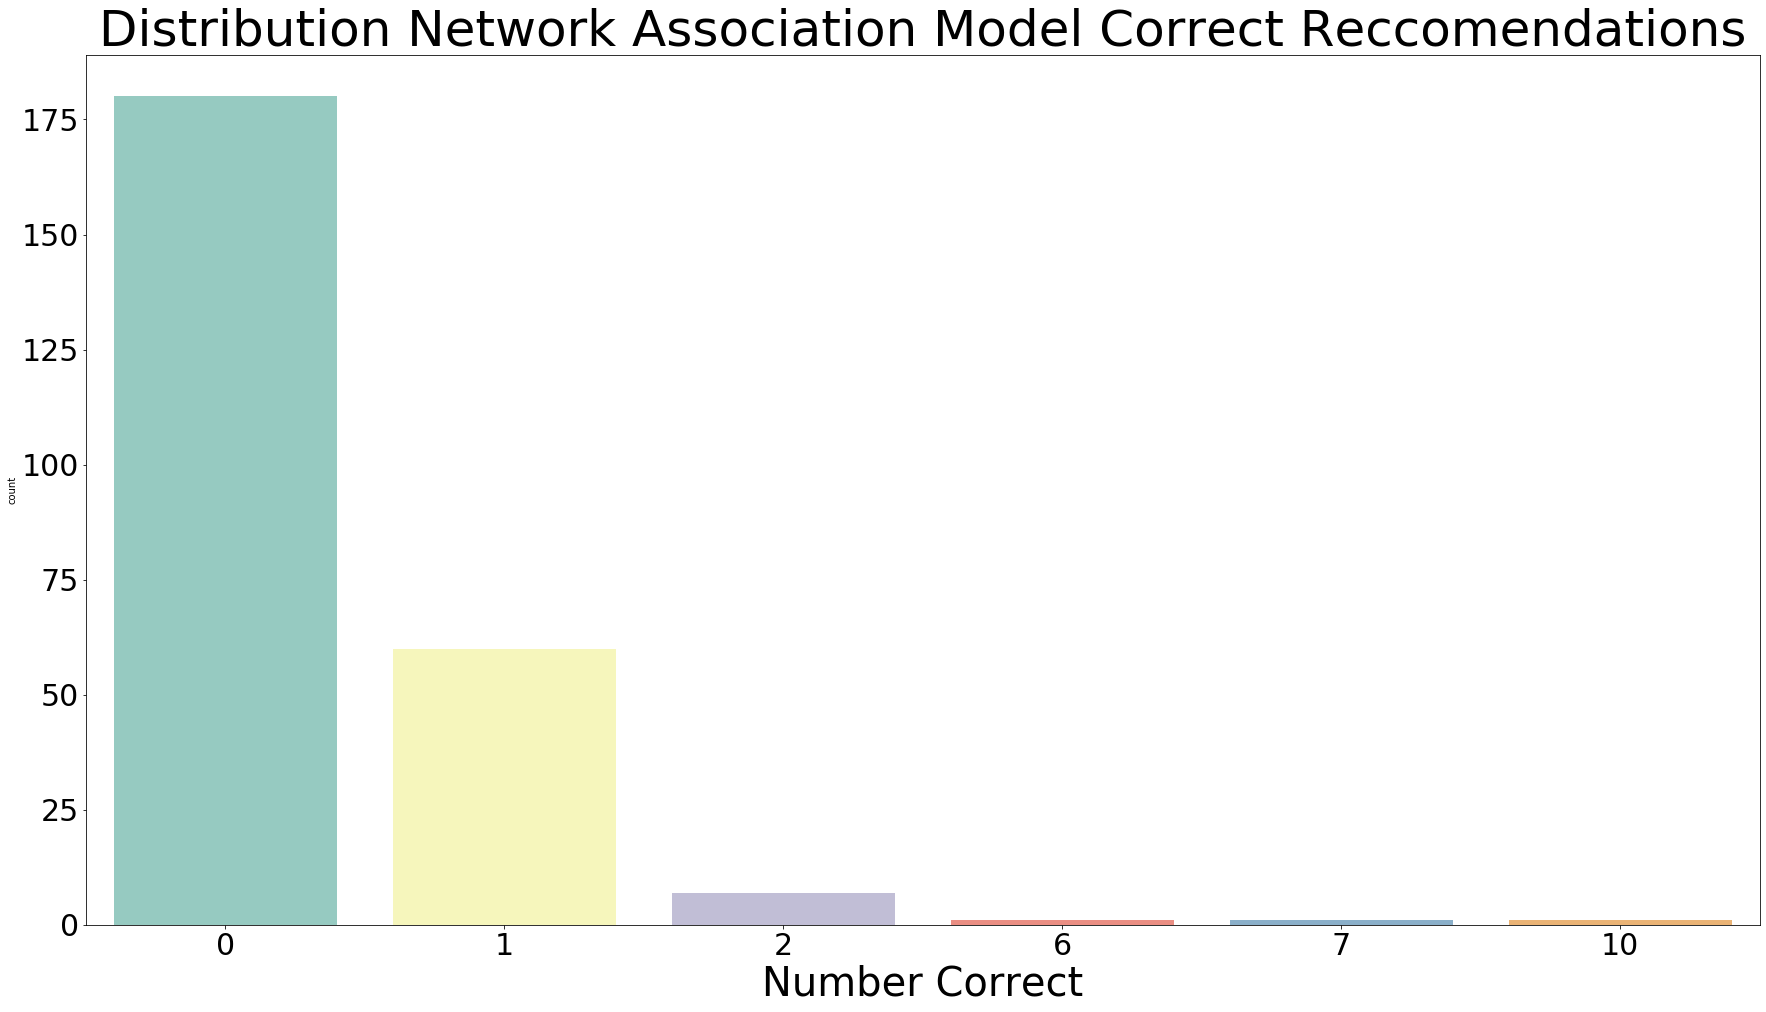

In [30]:
#1/5 of the recommendation were correct

plt.figure(figsize=(30,16))
catcnt = sns.countplot(x="Accuracy", data=accurcies,palette="Set3")
catcnt.axes.set_title("Distribution Network Association Model Correct Reccomendations",fontsize=50)
catcnt.set_xlabel("Number Correct",fontsize=40)
catcnt.tick_params(labelsize=30)

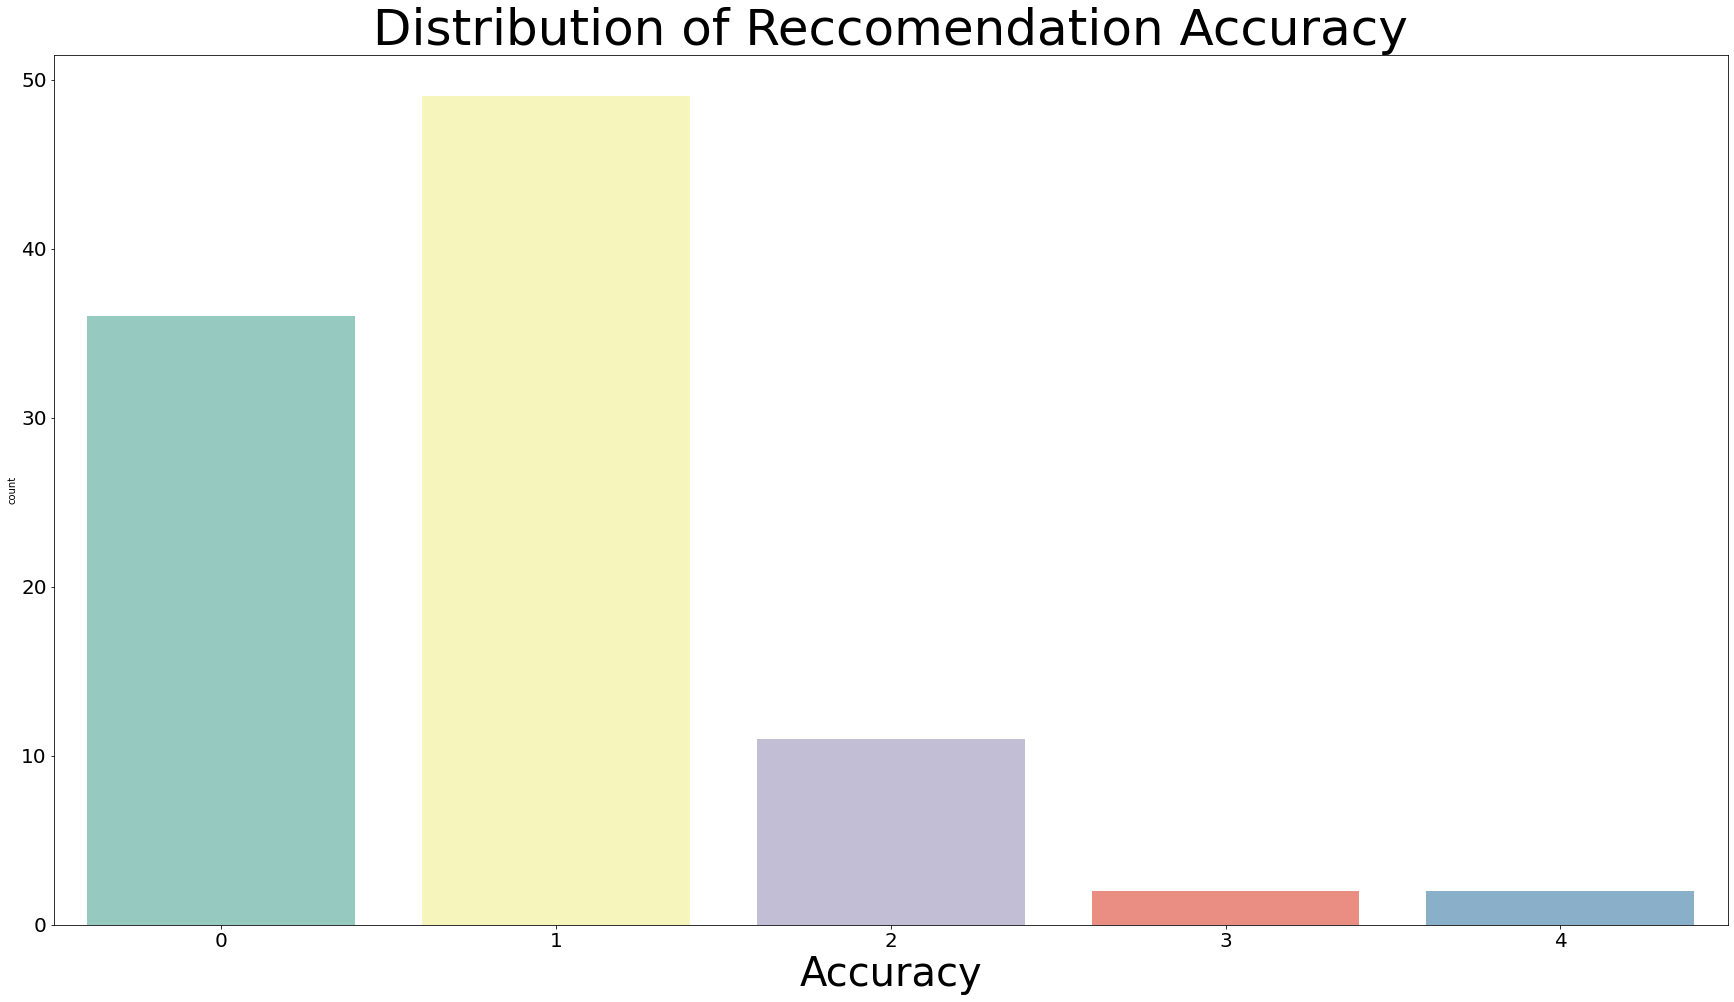

In [34]:
#dont do it !!!!!!!!!!!

#1/5 of the recommendation were correct

plt.figure(figsize=(30,16))
catcnt = sns.countplot(x="Accuracy", data=accurcies,palette="Set3")
catcnt.axes.set_title("Distribution of Reccomendation Accuracy",fontsize=50)
catcnt.set_xlabel("Accuracy",fontsize=40)
catcnt.tick_params(labelsize=20)

In [26]:
VPU[VPU.END_USER_ID == '91E9E26442E3A4E7B5488EBFDC26361D'].Vendor.tolist()[0]

['7A07BB33C6152690B88E290F6914F5A6',
 '5808D4F4E2ADE1859D788181D740F940',
 'D1BB02DB9ADF9B17723CD24E386D2A0A',
 'C806100AD2B61B06FE232468006BB818',
 '95E74678F58D7F04BA7ACA2FBCD36899',
 '537D0927BE83035D12B4F138B192A42D',
 'E11016BBE46D7FF112A2B4D2F34776D1',
 '11CA995A4746A5BB9A6C08B284DC8DA0',
 'F36F01EAE744B9E28ABF24659DC7DA79',
 '28A33BABD6D657A6925C60432600CC41',
 '493E9B4830E95D425AD2A271F801A9C0',
 '75882919BE4A82D5B5BDB1E89337F8D7',
 '48F9B31AE84FE972B37744983BA8CC85',
 '2139487FDFE1D470BBE9E3DAAD4E0B84',
 'A4190183C76E071BEE5E74B2629C637F',
 '63184ABE8B9DBEC9633451AB0AF82CD0',
 '5EA70470CC3BE29F101604DCD8BCBB58',
 '1DE7ED54EC516EF1A869D7C979626837',
 '9CB097CF7F1B88DC3DDC1E6D31DBE1E2',
 '712AE3DC969805D8BE3EFF33E7FFD2CB',
 '27D31D02914E99DA80E46A8BF1E2847D',
 'F2B45F8B98594E33145427891846FFD1',
 'E026842D4C0FF8FC2E9BAFC677A678C4',
 'F03022F90F791A438D9EFE63A8BBCBF9',
 '0C57785D8C42250848C40BF95EA6B0EB',
 '76327AEA150629712A2E721275ABB632',
 '9464654FF656ECFB51EBC546748FEE8E',
 

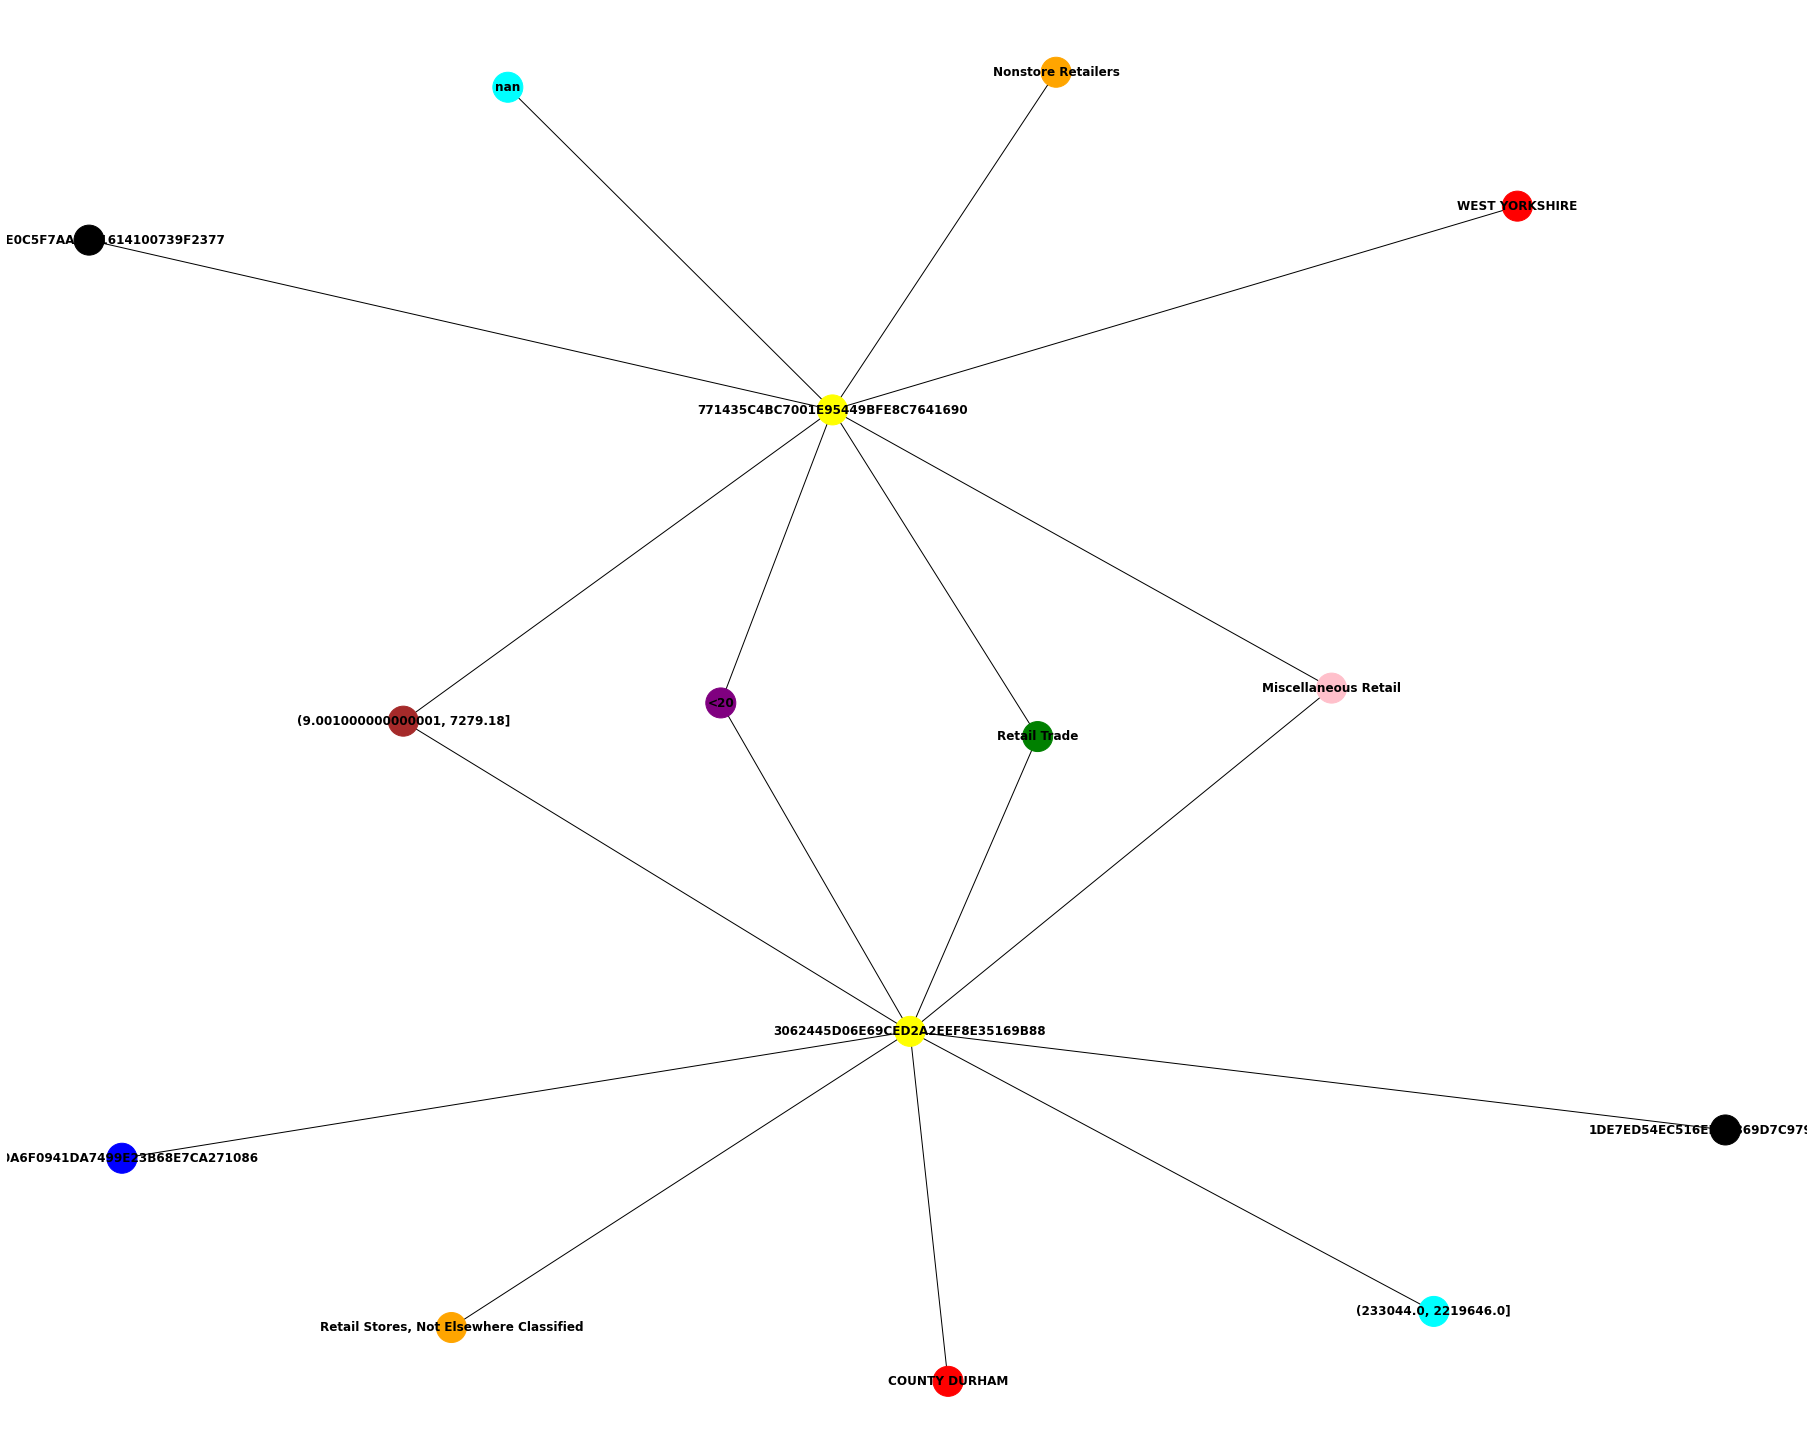

In [209]:
#plot network diagram by testing it with products to view similiarity patterns & what connects the two users together
#if cust in test set, we are assuming they didn't buy anything

list_in=["3062445D06E69CED2A2EEF8E35169B88",'771435C4BC7001E95449BFE8C7641690']
sub_graph = get_all_adj_nodes(list_in)
draw_sub_graph(sub_graph)

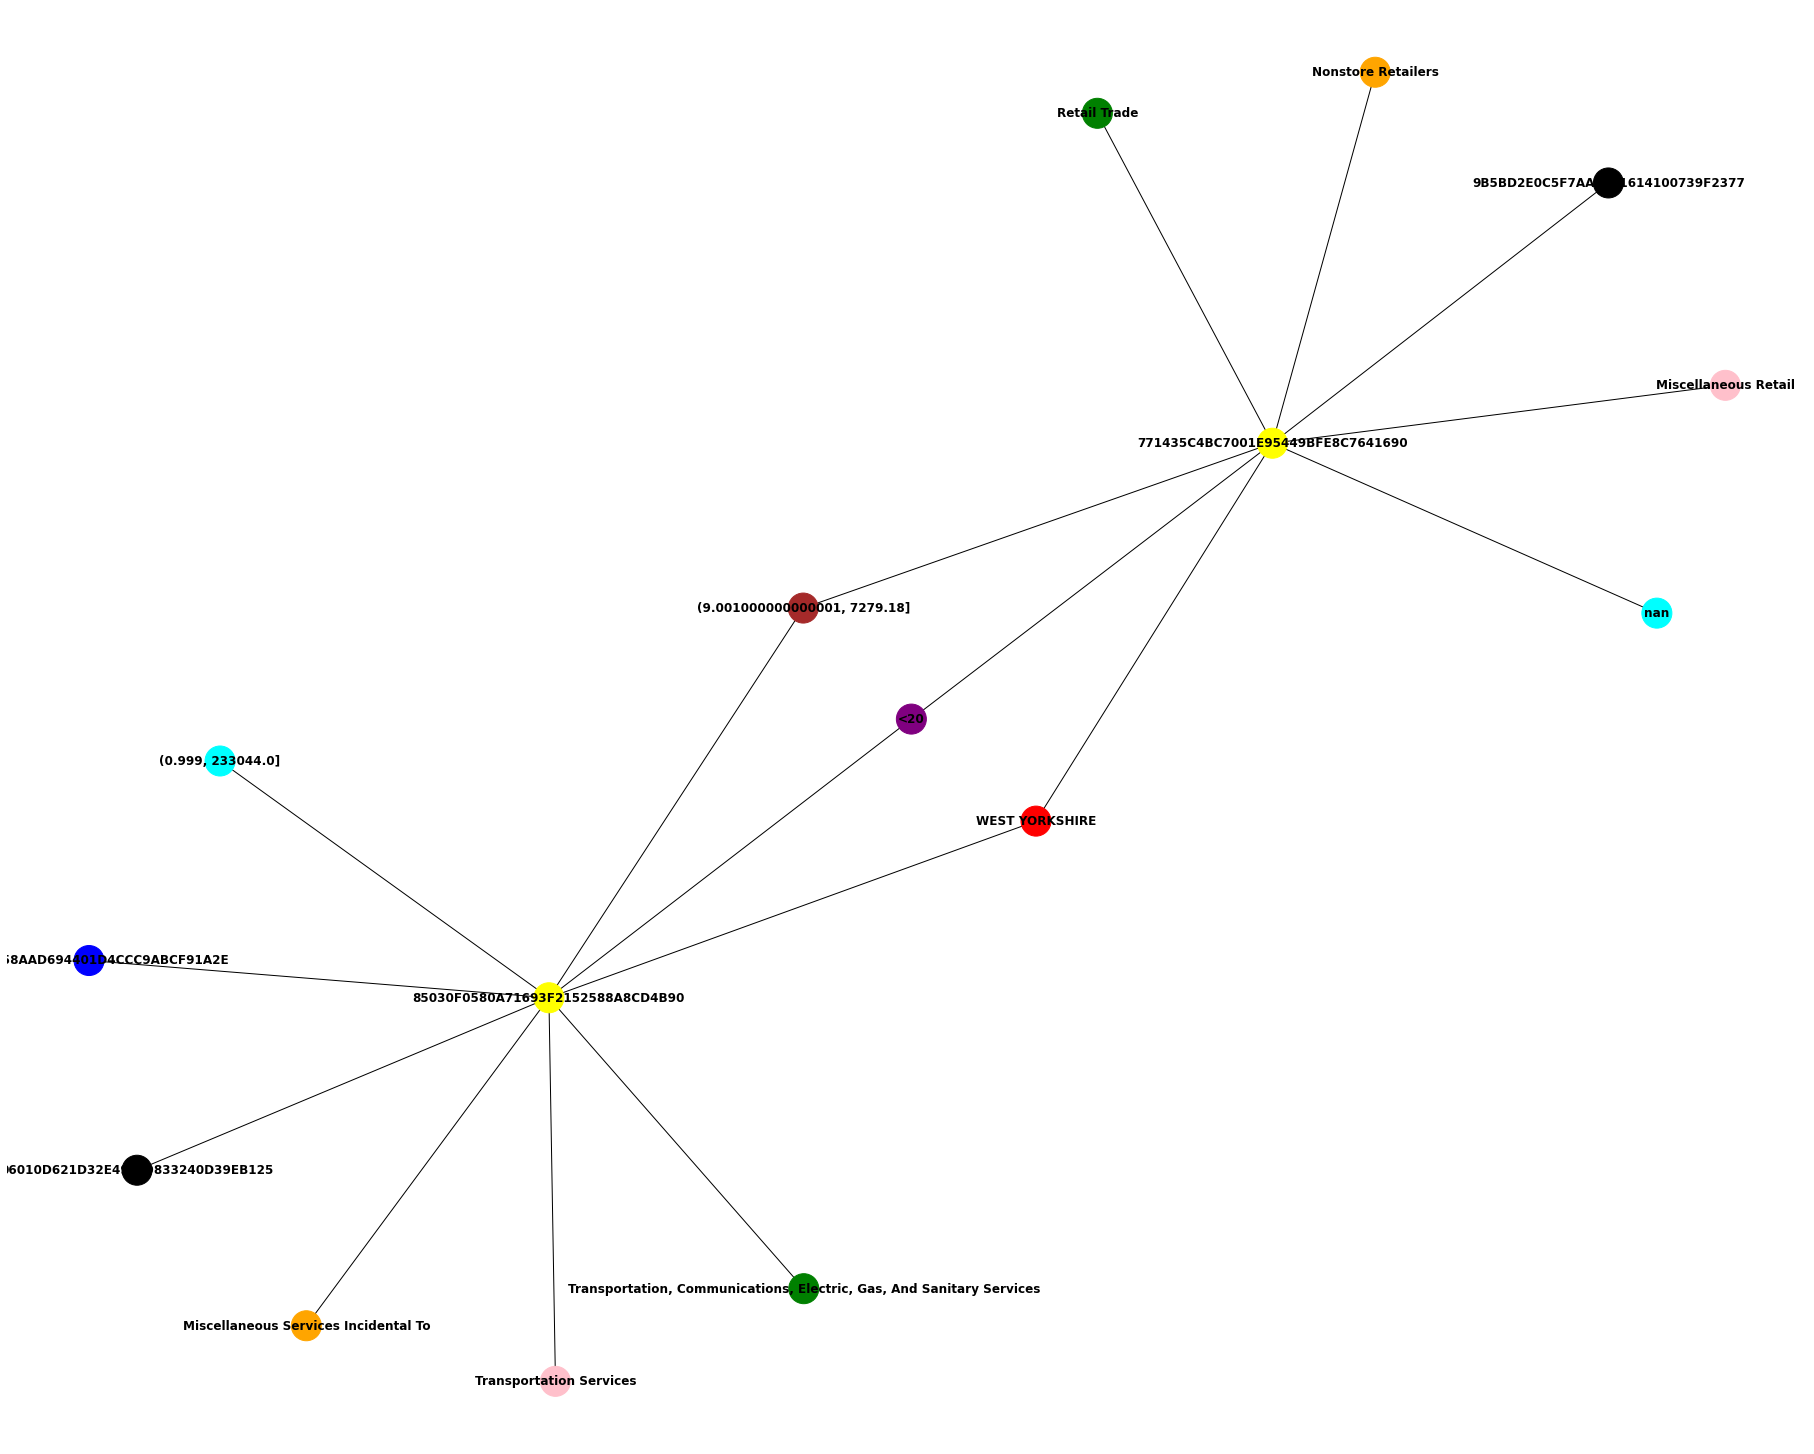

In [211]:
#plot another
list_in=["85030F0580A71693F2152588A8CD4B90","771435C4BC7001E95449BFE8C7641690"]
sub_graph = get_all_adj_nodes(list_in)
draw_sub_graph(sub_graph)

In [29]:
#look at customers that bought similiar products 
#get users 
#group by enduser
#add products that they bought: show one row per user 
#use EndUser and add everything we need to it: product id, total spent, vendor id, 

#get top 5 users, remove those items that they already bought, get accuracy
#if end user id in the list it will return products and remove all the current user bought already

#come up with rating system:



#replace products nodes that they prchased, replace with 0. Assume they didnt buy it before 

In [ ]:
1. sample
2. modify table
3. graph
4. compare results